<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>






# Neighboorhood and Spatial Correlation.



## Getting ready

Let me get two maps:

1. The USA map, at states level,  directly from census.gov, which has a good quality.

In [2]:
import geopandas as gpd

url = "https://www2.census.gov/geo/tiger/GENZ2023/shp/cb_2023_us_state_500k.zip"
us_states = gpd.read_file(url)
us_states.info(),us_states.crs.to_epsg(),us_states.crs.is_projected

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   56 non-null     object  
 1   STATENS   56 non-null     object  
 2   GEOIDFQ   56 non-null     object  
 3   GEOID     56 non-null     object  
 4   STUSPS    56 non-null     object  
 5   NAME      56 non-null     object  
 6   LSAD      56 non-null     object  
 7   ALAND     56 non-null     int64   
 8   AWATER    56 non-null     int64   
 9   geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 4.5+ KB


(None, 4269, False)

Notice this map has basic information per state. Also, notice the current crs will plot this:

<Axes: >

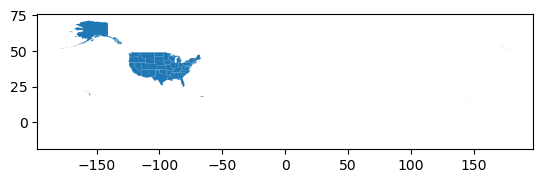

In [3]:
us_states.plot()

Let's reproject this map:

<Axes: >

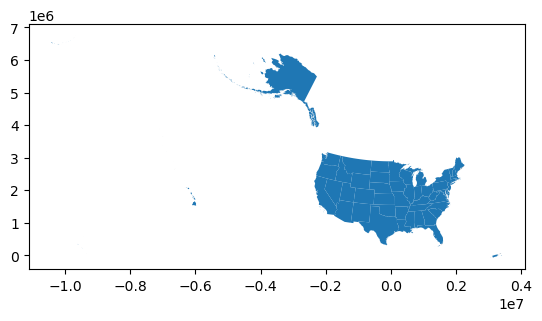

In [4]:
us_states=us_states.to_crs(5070)
us_states.plot()

Let's use the state name as index, that would help an easier identification of the places when we see most outputs (otherwise we will see just numerical indexes) :

In [5]:
us_states.set_index('NAME', inplace=True)
us_states.head()

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry
NAME,,,,,,,,,
New Mexico,35,00897535,0400000US35,35,NM,00,314198587197,726463919,"POLYGON ((-1231344.076 1018550.43, -1231015.83..."
South Dakota,46,01785534,0400000US46,46,SD,00,196341525171,3387709166,"POLYGON ((-633765.574 2472338.835, -633207.122..."
California,06,01779778,0400000US06,06,CA,00,403673296401,20291770234,"MULTIPOLYGON (((-2066923.367 1403703.122, -206..."
Kentucky,21,01779786,0400000US21,21,KY,00,102266598312,2384223544,"MULTIPOLYGON (((584560.04 1518183.089, 585066...."
Alabama,01,01779775,0400000US01,01,AL,00,131185049346,4582326383,"MULTIPOLYGON (((760323.731 857474.728, 760524...."


2. A map of Peru, at the 'distrito' level (similar to municipality in the USA - not exactly the same). The map comes from an unoffical [website](https://www.geogpsperu.com/p/descargas.html). Some columns have been added.

In [78]:
peruDataLink="https://github.com/CienciaDeDatosEspacial/dataSets/raw/refs/heads/main/PERU/PeruMaps.gpkg"
peru_distritos=gpd.read_file(peruDataLink,layer='distritos')

# some basic info
peru_distritos.info(),peru_distritos.crs.to_epsg(),peru_distritos.crs.is_projected

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   DEPARTAMEN                1874 non-null   object  
 1   PROVINCIA                 1874 non-null   object  
 2   DISTRITO                  1874 non-null   object  
 3   Ubigeo                    1874 non-null   object  
 4   Poblacion                 1874 non-null   int64   
 5   Superficie                1874 non-null   float64 
 6   IDH2019                   1874 non-null   float64 
 7   Educ_sec_comp2019_pct     1874 non-null   float64 
 8   NBI2017_pct               1874 non-null   float64 
 9   Viv_sin_serv_hig2017_pct  1874 non-null   float64 
 10  geometry                  1874 non-null   geometry
dtypes: float64(5), geometry(1), int64(1), object(4)
memory usage: 161.2+ KB


(None, 4326, False)

Let's reproject and plot:

<Axes: >

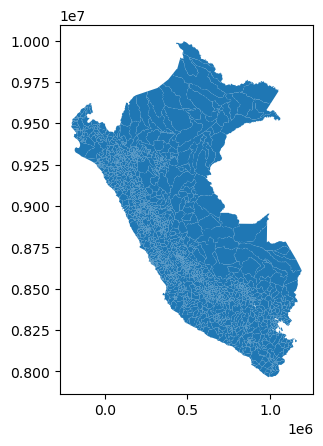

In [7]:
peru_distritos=peru_distritos.to_crs(5387)
peru_distritos.plot()

Besides the spatial units (DEPARTAMEN, PROVINCIA, DISTRITO, and Ubigeo - "Ubigeo" is a code ), you have:
 - **Poblacion**: Population (2017)
 - **Superficie**: Area               
 - **IDH2019**: Human Development Index for DISTRITO (2019)                   
 - **Educ_sec_comp2019_pct**: Share of Population that finished High-School (2019)     
 - **NBI2017_pct**: Share of Population with poverty at the household level aggregated by DISTRITO. This index ("Unsatisfied Basic Needs") uses observable living conditions rather than income alone (2017).
 - **Viv_sin_serv_hig2017_pct**: Share of housing units that have no sanitation infrastructure aggregated by  DISTRITO (2017)

Notice we should not use the 'distrito' name as index, because several of them are repeated:

In [62]:
peru_distritos[peru_distritos['DISTRITO'].duplicated()]

,DEPARTAMEN,PROVINCIA,DISTRITO,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct,geometry
191,PUNO,LAMPA,PALCA,210706,2871,483.96,0.465326,68.506619,61.6,14.3,"MULTIPOLYGON (((980731.13 8315234.38, 980743.3..."
214,AYACUCHO,PAUCAR DEL SARA SARA,LAMPA,050804,2590,289.45,0.395363,60.608667,31.3,15.4,"MULTIPOLYGON (((666120.18 8335108.23, 666139.9..."
256,AYACUCHO,LUCANAS,SANTA LUCIA,050621,889,1019.14,0.442814,58.278405,64.7,47.6,"MULTIPOLYGON (((565436.58 8372074.78, 565495.3..."
259,AYACUCHO,LUCANAS,SAN CRISTOBAL,050615,2182,391.83,0.236161,68.230879,31.5,13.7,"MULTIPOLYGON (((576905.62 8374974.87, 577009.7..."
272,CUSCO,ESPINAR,COPORAQUE,080803,18004,1564.46,0.289550,75.551079,26.1,8.9,"MULTIPOLYGON (((863229.34 8390956.29, 863465.6..."
...,...,...,...,...,...,...,...,...,...,...,...
1844,LIMA,LIMA,LA VICTORIA,150115,169270,8.74,0.714159,74.791799,15.3,0.0,"MULTIPOLYGON (((280479.644 8666127.228, 280593..."
1845,LIMA,LIMA,SAN LUIS,150134,59377,3.49,0.793258,80.699041,9.4,0.0,"MULTIPOLYGON (((282530.051 8665926.351, 282499..."
1847,LIMA,LIMA,SAN MIGUEL,150136,139399,10.72,0.822401,76.664090,4.5,0.0,"MULTIPOLYGON (((273775.884 8664656.624, 273772..."
1855,LIMA,LIMA,SAN ISIDRO,150131,54298,11.10,0.788832,78.470219,1.1,0.0,"MULTIPOLYGON (((277019.308 8663207.821, 277130..."


Let's use 'Ubigeo', although is not the best solution

In [142]:
# of course 
peru_distritos[peru_distritos['Ubigeo'].duplicated()]

,DEPARTAMEN,PROVINCIA,DISTRITO,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct,geometry


In [143]:
#then
peru_distritos.set_index('Ubigeo', inplace=True)

## Who is my neighbor?

The basic idea is pretty simple; but as usual in social matters, a simple concept may have  different definitions. If we restrict our concept to spatial matters, a neighbor is whoever or whichever is close or nearby. 

So far we have found ways to 'detect' a neighbor for a particular spatial unit:

- Whichever is within a radius, using buffers.
- Whichever touches my boundaries, using sjoins.
- Whichever is within an area of interest, using sjoins/overlays.

In all the above, distance and set operations have played a major role. Now let's explore a different approach—a relational one—where the concepts from chess (rook, queen) become surprisingly useful.

Take a look at the **queen** and **rook** relationship:

<center><img src="https://github.com/CienciaDeDatosEspacial/spatial_autoCorr/raw/main/rookQueen.png" width="700"></center>

From the image above:
- Your **rook** neighbor is whichever  shares a border with you (a borderline of at least two points). It is also known as the _Von Neumann_ neighbor.
- Your **queen** neighbor is whichever  shares a border or a corner with you (at least one point).It is also known as the _Moore_ neighbor.


### The ROOK neighbors

Who is your Rook neighbor? **build_contiguity** (from _libpysal.graph_) has the answer.

In [8]:
from libpysal.graph import Graph

us_states_rook=Graph.build_contiguity(us_states,rook=True)

What did we just get?

In [9]:
type(us_states_rook)

libpysal.graph.base.Graph

We have a **Graph** (network).

A node is a state, and the link between nodes represent a 'these are neighbors'.

A 'Graph' object has a plot() function:


<Axes: >

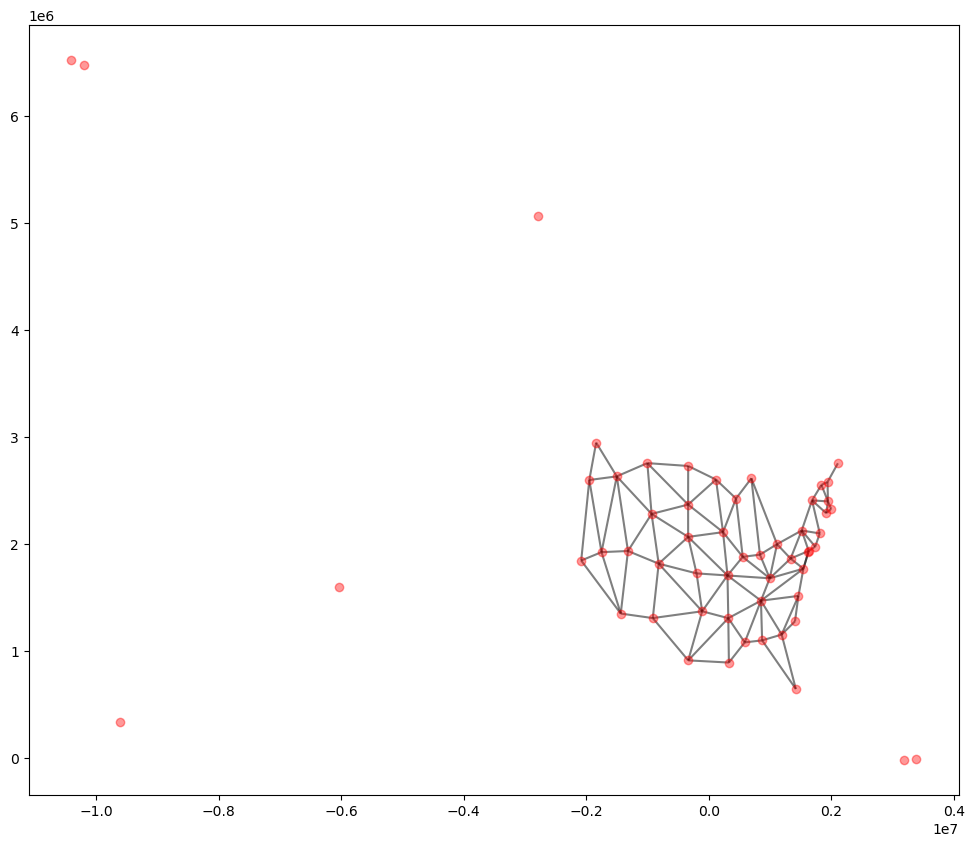

In [10]:
us_states_rook.plot(gdf=us_states, 
                    node_kws=dict(alpha=0.4, color='red'), 
                    edge_kws=dict(alpha=0.5, color='k'),figsize=(12, 10))

Notice you see isolates: some states have no rook neighbors:

In [23]:
us_states_rook.isolates

Index(['Alaska', 'American Samoa', 'United States Virgin Islands', 'Hawaii',
       'Guam', 'Commonwealth of the Northern Mariana Islands', 'Puerto Rico'],
      dtype='object', name='focal')

For sure, Graph's plot and Geopandas' plot work well together:

<Axes: >

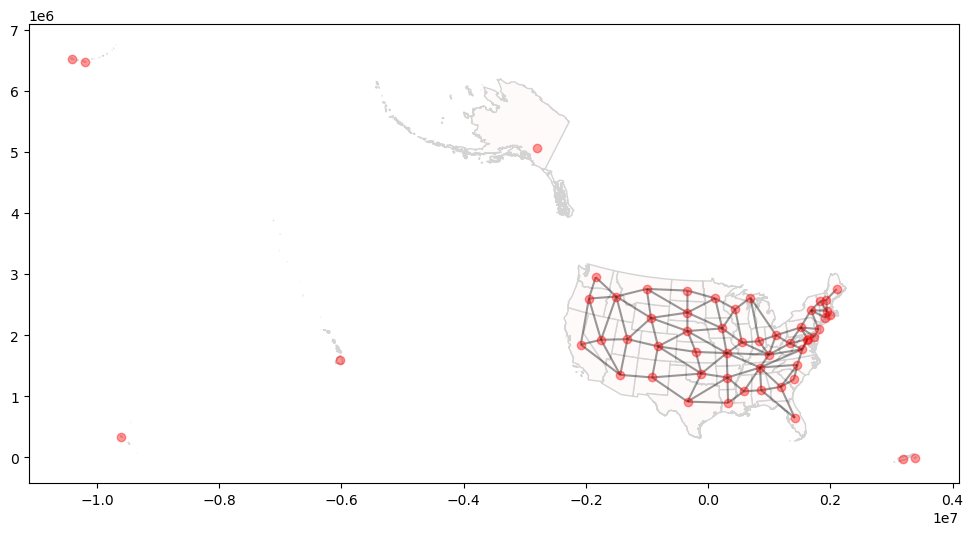

In [11]:
# geopandas plot
base=us_states.plot(color='snow', edgecolor='lightgrey',figsize=(12, 10))

# graph plot
us_states_rook.plot(
    gdf=us_states,                # ← Provides the spatial coordinates
    ax=base,                      # ← Same axis
    node_kws=dict(alpha=0.4,color='red'),     # ← Style for polygon centroids (nodes)
    edge_kws=dict(alpha=0.4,color='k')     # ← Style for connections (edges)
)

We can know several interesting information from this output:

1. Count of nodes, count of rook neighbor relationships

In [12]:
us_states_rook.n, us_states_rook.n_edges/2

(56, 107.0)

2. For each state(focal node) which is a neighbor?

In [13]:
us_states_rook.adjacency

focal          neighbor   
New Mexico     Colorado       1
               Oklahoma       1
               Arizona        1
               Texas          1
South Dakota   Wyoming        1
                             ..
West Virginia  Ohio           1
               Virginia       1
Louisiana      Arkansas       1
               Texas          1
               Mississippi    1
Name: weight, Length: 221, dtype: int64

3. For each state(focal node) how many neighbors does he have?

In [14]:
us_states_rook.cardinalities

focal
New Mexico                                      4
South Dakota                                    6
California                                      3
Kentucky                                        7
Alabama                                         4
Georgia                                         5
Arkansas                                        6
Pennsylvania                                    6
Missouri                                        8
Colorado                                        6
Utah                                            5
Oklahoma                                        6
Tennessee                                       8
Wyoming                                         6
New York                                        5
Indiana                                         4
Kansas                                          4
Idaho                                           6
Alaska                                          0
Nevada                                      

We can see a distribution of the cardinalities like this:

<Axes: ylabel='Frequency'>

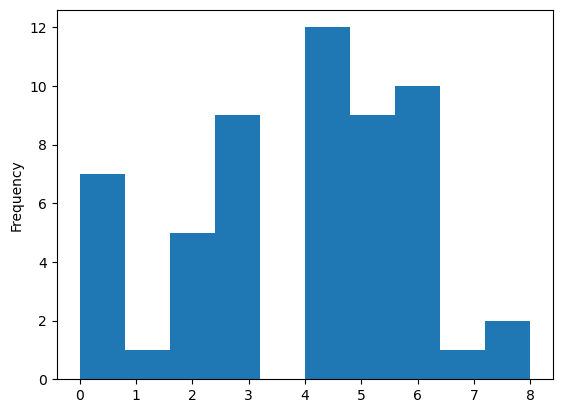

In [44]:
us_states_rook.cardinalities.plot(kind='hist')

### The QUEEN neighbors

The same function can give us the Queen neigbors:

In [16]:
us_states_queen=Graph.build_contiguity(us_states,rook=False)

If there are not adjacent polygons , they will still be isolates:

In [24]:
us_states_queen.isolates

Index(['Alaska', 'American Samoa', 'United States Virgin Islands', 'Hawaii',
       'Guam', 'Commonwealth of the Northern Mariana Islands', 'Puerto Rico'],
      dtype='object', name='focal')

Compare the cardinalities:

<Axes: ylabel='Frequency'>

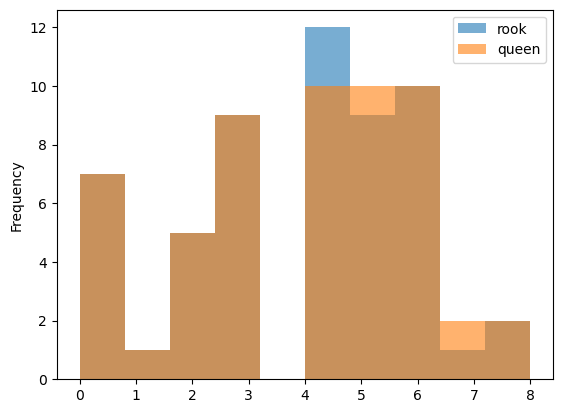

In [51]:
us_states_rook.cardinalities.rename('rook').plot(kind='hist',legend=True,alpha=0.6)
us_states_queen.cardinalities.rename('queen').plot(kind='hist',legend=True,alpha=0.6)



In general, when we request queen neighbors, you would see more values on the rigth tail, and some more flatteing (dispersion). 

Let's confirm the difference (and the quality of the map)

In [18]:
check=['Colorado']

us_states_rook.adjacency.loc[check]

focal     neighbor  
Colorado  New Mexico    1
          Utah          1
          Oklahoma      1
          Wyoming       1
          Kansas        1
          Nebraska      1
Name: weight, dtype: int64

In [19]:
us_states_queen.adjacency.loc[check]

focal     neighbor  
Colorado  New Mexico    1
          Utah          1
          Oklahoma      1
          Wyoming       1
          Kansas        1
          Arizona       1
          Nebraska      1
Name: weight, dtype: int64

Arizona is a queen neighbor only. This difference is due to the Four Corners Monument where Colorado meets Arizona at a single point. Our ap seems to have pretty good quality!

focal
New Mexico                                      8
South Dakota                                    8
California                                      8
Kentucky                                        8
Alabama                                         8
Georgia                                         8
Arkansas                                        8
Pennsylvania                                    8
Missouri                                        8
Colorado                                        8
Utah                                            8
Oklahoma                                        8
Tennessee                                       8
Wyoming                                         8
New York                                        8
Indiana                                         8
Kansas                                          8
Idaho                                           8
Alaska                                          8
Nevada                                      

### The KNN neighbors

This is a total different idea. Here you get the actual 'K" neighbors of any focal point. Adjacency is not a problem, only proximity.
Let me compute the 8 closest neighbosr for every state:

In [20]:
# K= 8
us_states_knn8 = Graph.build_knn(us_states.representative_point(), k=8)

Let's plot the result:

<Axes: >

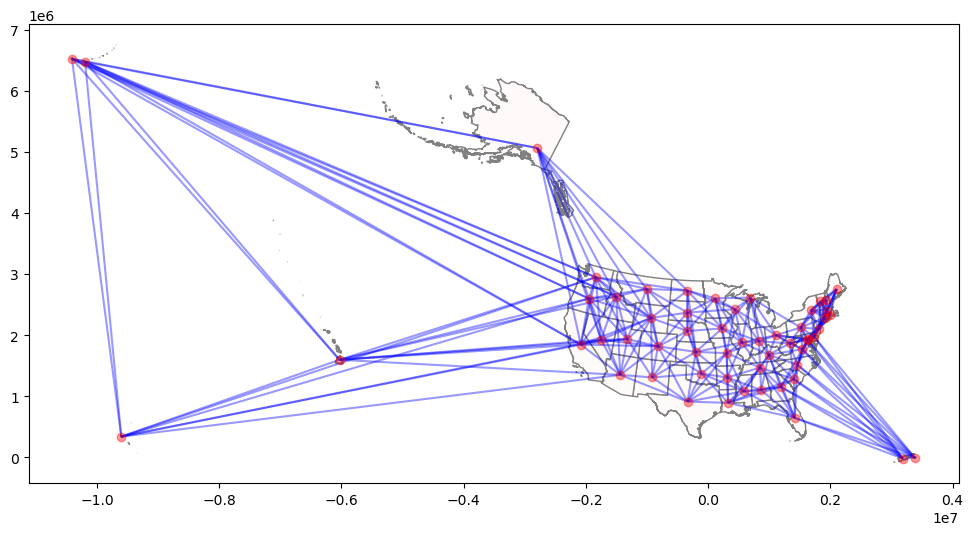

In [22]:
base=us_states.plot(color='snow', edgecolor='grey',figsize=(12, 10))

us_states_knn8.plot(
    us_states,                    # ← Provides the spatial coordinates
    ax=base,                      # ← Same axis
    node_kws=dict(alpha=0.4,color='red'),     # ← Style for polygon centroids (nodes)
    edge_kws=dict(alpha=0.4,color='blue')     # ← Style for connections (edges)
)

You see no isolates this time, each state has 8 neighbors. 

This plot confirms the lack of variability:

<Axes: ylabel='Frequency'>

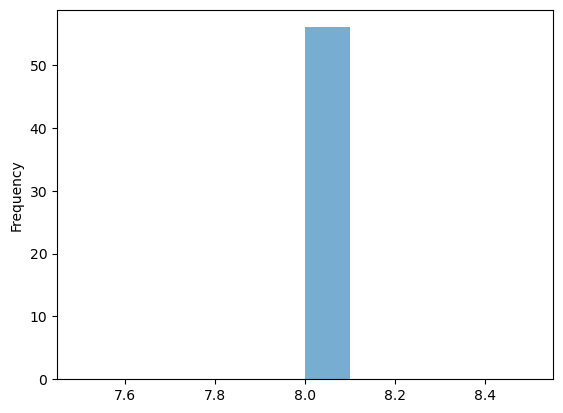

In [57]:
us_states_knn8.cardinalities.plot(kind='hist',alpha=0.6)

## Am I independent from my neighbors?

This is a crucial moment is statistics: traditionally, we assume our situation is independent of others'; so sampling may reveal unbiased  population insights. But, what if neigbors are affecting one another.

Of course, by situation we mean a variable, for example, average HS completed in my 'distrito':

In [144]:
peru_distritos.Educ_sec_comp2019_pct.describe()

count    1874.000000
mean       55.769523
std        15.728123
min        11.974433
25%        44.466678
50%        57.164771
75%        68.202230
max        91.744878
Name: Educ_sec_comp2019_pct, dtype: float64

See the choropleth:

<Axes: >

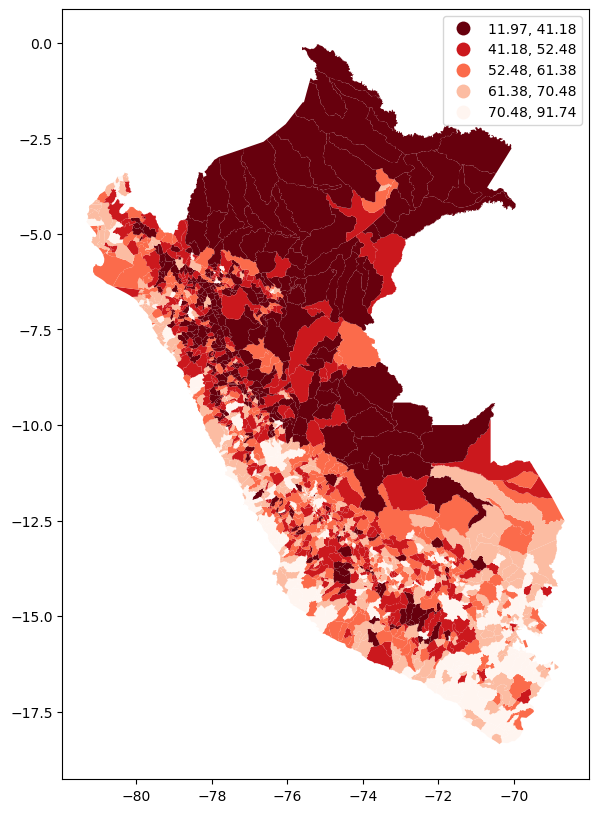

In [145]:
peru_distritos.plot(
    "Educ_sec_comp2019_pct",
    scheme="quantiles",
    cmap="Reds_r",
    legend=True,figsize=(12, 10))

The job now, is to compute the average of my neighbors on this variable.

### Adjacency and weights


We know by now that we have to decide one neighborhood approach. Then, let's compute the queen neighbors:

In [146]:
peru_distritos_queen=Graph.build_contiguity(peru_distritos,rook=False)

Now, we have the neighbors:

In [147]:
peru_distritos_queen.adjacency

focal   neighbor
230110  230108      1
        230101      1
230108  230110      1
        230103      1
        230101      1
                   ..
150140  150141      1
        150122      1
        150133      1
        150104      1
        150108      1
Name: weight, Length: 11052, dtype: int64

Let me turn that into a 'wide shape':

In [148]:
import pandas as pd 

# Reshape from long to wide format
adj_matrix = pd.DataFrame(peru_distritos_queen.adjacency).reset_index()
adj_matrix_wide = adj_matrix.pivot_table(
    index='focal', 
    columns='neighbor', 
    values='weight',
    fill_value=0
)

adj_matrix_wide

neighbor,010101,010102,010103,010104,010105,010106,010107,010108,010109,010110,...,250201,250202,250203,250204,250301,250302,250303,250304,250305,250401
focal,,,,,,,,,,,,,,,,,,,,,
010101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010102,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010103,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010105,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
250303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
250304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


Of course, you could get the cardinalities this way:

In [141]:
adj_matrix_wide.sum(axis=1)

focal
0       2.0
1       6.0
2       3.0
3       8.0
4       5.0
       ... 
1869    5.0
1870    7.0
1871    6.0
1872    2.0
1873    8.0
Length: 1874, dtype: float64

But we do not need cardinalities here. If needed it, I will simply be able to compute the average 

What I need is to use this neighborhood as a way to weight their effect on my situation.



You can compute the adjacency with the weights now:

In [49]:
peru_distritos_rook=peru_distritos_rook.transform("r")

In [ ]:
The way to know if my value (education level) depends on my neigbor's, is to represent each 'distrito" by the average of my neighbor values. 


Now, that weighted mean is the **lagged** variables:

In [50]:
y = peru_distritos["Educ_sec_comp2019_pct"]
ylag = peru_distritos_rook.lag(y)

Let me add it to the GDF:

In [51]:
peru_distritos=peru_distritos.assign(Educ_sec_comp2019_pct_lagged=ylag)

Plot both to compare:

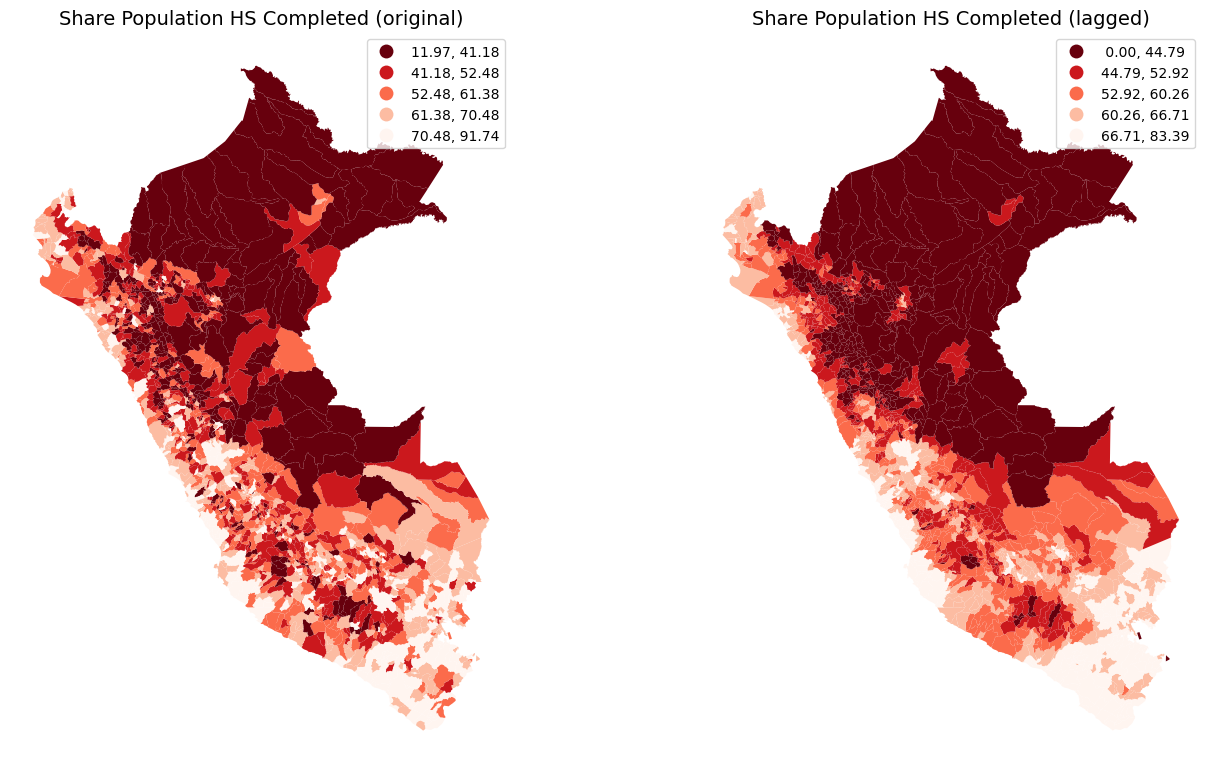

In [54]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

commonParams=dict(scheme="quantiles",cmap="Reds_r",legend=True)
# --- MAP 1
peru_distritos.plot("Educ_sec_comp2019_pct",ax=axes[0],**commonParams)
axes[0].set_title('Share Population HS Completed (original)', fontsize=14)
axes[0].set_axis_off()

# --- MAP 2
peru_distritos.plot("Educ_sec_comp2019_pct_lagged",ax=axes[1],**commonParams)
axes[1].set_title('Share Population HS Completed (lagged)', fontsize=14)
axes[1].set_axis_off()

plt.tight_layout()
plt.show()


<Axes: xlabel='Educ_sec_comp2019_pct', ylabel='Educ_sec_comp2019_pct_lagged'>

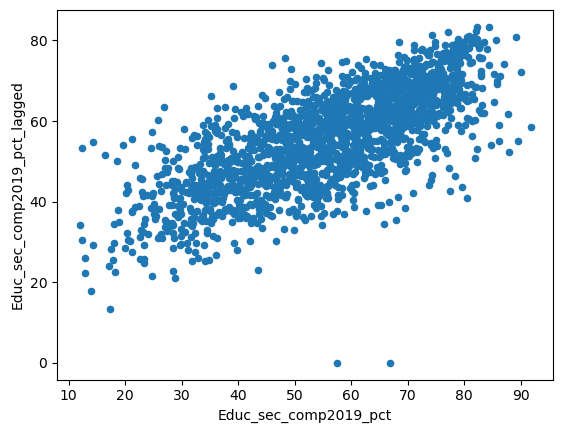

In [55]:
peru_distritos.plot.scatter("Educ_sec_comp2019_pct","Educ_sec_comp2019_pct_lagged")

In [ ]:
from libpysal.weights import Queen, Rook, KNN

# rook
w_rook = Rook.from_dataframe(peru_distritos,use_index=False) 

The presence of _islands_ will be problematic in more complex applications. An alternative is:

3) Nearest neighbors:

In [ ]:
# k=8 nearest neighbors
w_knn8 = KNN.from_dataframe(peru_distritos, k=8)

In [ ]:
w_knn8.islands

## Global spatial correlation

If a spatial unit (a row) value in a variable is correlated with values of the neighbors, you know that proximity is interfering with the interpretation.

We need the neighboorhood matrix (the weight matrix) to compute spatial correlation.

If we standardize by row, the neighboors in a row add to 1:

In [ ]:
# needed for spatial correlation
w_knn8.transform = 'R'

Spatial correlation is measured by the Moran's I statistic:

In [ ]:
from esda.moran import Moran

moranHS = Moran(peru_distritos['Educ_sec_comp2019_pct'], w_knn8)
moranHS.I,moranHS.p_sim

A significant Moran's I suggest spatial correlation. Let's see the spatial scatter plot

In [ ]:
from splot.esda import moran_scatterplot

fig, ax = moran_scatterplot(moranHS, aspect_equal=True)
ax.set_xlabel('moranHS_std')
ax.set_ylabel('moranHS_lagged_std');

## Local Spatial Correlation

We can compute a Local Index of Spatial Association (LISA -local Moran) for each map object. That will help us find spatial clusters (spots) and spatial outliers:

* A **hotSpot** is a polygon whose value in the variable is high AND is surrounded with polygons with also high values.

* A **coldSpot** is a polygon whose value in the variable is low AND is surrounded with polygons with also low values.

* A **coldOutlier** is a polygon whose value in the variable is low BUT is surrounded with polygons with  high values.

* A **hotOutlier** is a polygon whose value in the variable is high BUT is surrounded with polygons with  low values.

It is also possible that no significant correlation is detected. Let's see those values:

In [ ]:
# A LISA for each district using IDH2019
from esda.moran import Moran_Local
lisaHS = Moran_Local(y=peru_distritos['Educ_sec_comp2019_pct'], w=w_knn8,seed=2022)

In [ ]:
fig, ax = moran_scatterplot(lisaHS,p=0.05)
ax.set_xlabel('HS_std')
ax.set_ylabel('HS_lagged_std');

In [ ]:
from splot.esda import lisa_cluster

lisa_cluster(lisaHS, peru_distritos, p=0.05, figsize=(8, 8))
plt.show()

In [ ]:
peru_distritos

In [ ]:
lisaResults=pd.DataFrame({
    'quadrant': lisaHS.q,
    'p_value': lisaHS.p_sim,
    'significant': lisaHS.p_sim < 0.05
})

# quadrant: 1 HH,  2 LH,  3 LL,  4 HL
lisaResults

In [ ]:
lisaResults['HS_lisa']=[l if p <0.05 else 0 for l,p in zip(lisaHS.q,lisaHS.p_sim)  ]


lisaResults

In [ ]:

labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']

lisaResults['HS_lisa_quadrant']=[labels[i] for i in lisaResults['HS_lisa']]

lisaResults['HS_lisa_quadrant'].value_counts()

In [ ]:
peru_distritos['HS_lisa_quadrant']=lisaResults['HS_lisa_quadrant']

In [ ]:
peru_distritos.crs

In [ ]:
import matplotlib.pyplot as plt
# custom colors
from matplotlib import colors
myColMap = colors.ListedColormap([ 'white', 'pink', 'cyan', 'azure','red'])

peru_distritos.plot(column='HS_lisa_quadrant', 
                categorical=True,
                cmap=myColMap,
                linewidth=0.1, 
                edgecolor='k',
                legend=True,
                legend_kwds={'bbox_to_anchor': (0.3, 0.3)},
                figsize=(12,12))


You find that a district is in a **quadrant**. If the district is NOT grey, then the LISA is significant. Let's represent that information in a map, using the lisaIDH object:

The info in **lisaIDH.q** can not be used right away, we need to add if the local spatial correlation is significant:

Now, we recode: